In [5]:
import pandas as pd
import missingno as msno
import os


file_path = os.path.join("..", "data", "trondheim_vaerdata_full_1.csv")

df = pd.read_csv(file_path)

#print(df.dtypes)

df['Tidspunkt'] = pd.to_datetime(df['Tidspunkt'])
df['weekday'] = df['Tidspunkt'].dt.strftime('%A')
df['hour'] = df['Tidspunkt'].dt.hour
 
filtered_df = df[(df['weekday'].isin(['Saturday'])) & (df['hour'].between(10,16))]



Tidspunkt               0
Temperatur (°C)         0
Vindhastighet (km/t)    0
Trykk                   0
Nedbør (mm)             0
weekday                 0
hour                    0
dtype: int64


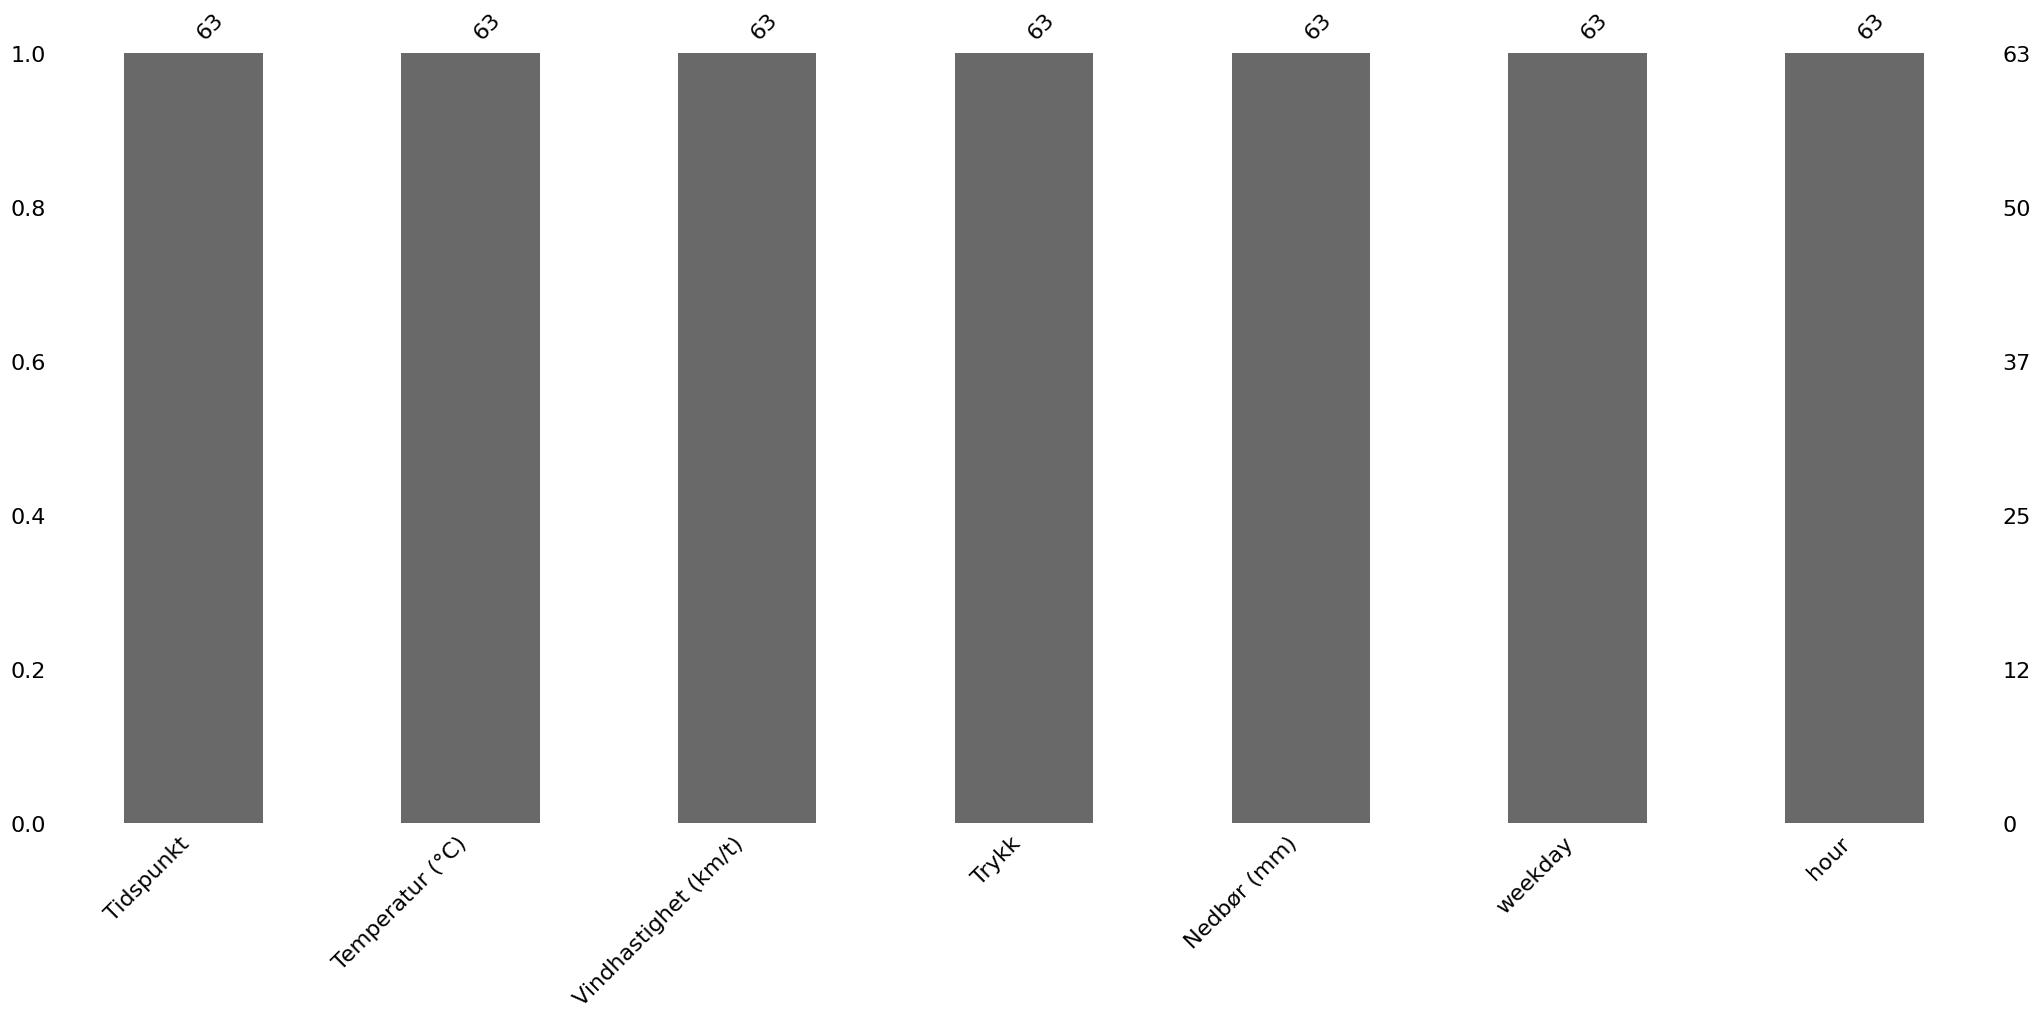

In [6]:
#Sjekke mangler i datasettet

file_path_2 = os.path.join("..", "data", "filtered_data_Saturday.csv")

df = pd.read_csv(file_path_2)

missing_value = df.isnull().sum()

print(missing_value)

msno.bar(df)


#HÅNDTERING AV UREGELMESSIGHETER
#værdata som kan være feilmålinger, som ekstreme temperaturer osv, plutselig hopp
df = df[(df["Temperatur (°C)"]>-50) & (df["Temperatur (°C)"]<50)]
df = df[(df["Trykk"]>900) & (df["Trykk"]<1100)]
df = df[(df["Vindhastighet (km/t)"]>45) & (df["Vindhastighet (km/t)"]<0)]

#erstatt feil med NaN
df.replace(-9999, None, inplace=True)
df["TempDiff"] = df["Temperatur (°C)"].diff() #beregn differansen mellom hver måling
df["UnormalHoppTemp"] = df["TempDiff"].apply(lambda x: "Ja" if abs(x) > 10 else "Nei") #Markerer plutselige endringer

df["PressureDiff"] = df["Trykk"].diff() #differanse mellom hver måling
df["UnormalHoppPressure"] = df["PressureDiff"].apply(lambda x: "Ja" if abs(x) > 100 else "Nei") #Markerer plutselige endringer


df["Wind_speedDiff"] = df["Vindhastighet (km/t)"].diff()  #differanse mellom hver måling
df["UnormalHoppWind"] = df["Wind_speedDiff"].apply(lambda x: "Ja" if abs(x) > 10 else "Nei") #Markerer plutselige endringer

df["NedborDiff"] = df["Nedbør (mm)"].diff()  #differanse mellom hver måling
df["UnormalHoppNedbor"] = df["NedborDiff"].apply(lambda x: "Ja" if abs(x) > 10 else "Nei") #Markerer plutselige endringer






In [7]:
#Sammenligne Pandas med Pandasql

df["TemperaturKategori"] = ["Kaldt" if temp2 < 10
                            else "mildt" if temp2 < 20 
                            else "varmt" for temp2 in df["Temperatur (°C)"]
                            ]

df["VindKategori"] = ["Vindstille" if vind2 < 2
                      else "Lett bris" if vind2 < 10
                      else "Sterk vind" if vind2 < 20
                      else "Storm" for vind2 in df["Vindhastighet (km/t)"]]

df["TrykkKategori"] = ["Høyttrykk" if trykk2 > 1013
                       else "Lavtrykk" for trykk2 in df["Trykk"]]

df["NedborKategori"] = ["Tørt" if nedbor2 == 0
                        else "Lett regn" if nedbor2 < 5
                        else "Mye regn" if nedbor2 < 20
                        else "Ekstrem vær" for nedbor2 in df["Nedbør (mm)"]]


df.head()



,Tidspunkt,Temperatur (°C),Vindhastighet (km/t),Trykk,Nedbør (mm),weekday,hour,TempDiff,UnormalHoppTemp,PressureDiff,UnormalHoppPressure,Wind_speedDiff,UnormalHoppWind,NedborDiff,UnormalHoppNedbor,TemperaturKategori,VindKategori,TrykkKategori,NedborKategori
